In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import ttest_1samp
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [188]:
df = pd.read_csv("/kaggle/input/data-open-2023-additional-data/df_merged_v3_v2.csv")
df.dropna(inplace=True)
df.drop(columns={"Unnamed: 0"}, inplace=True)
df.sort_values(["year_month", "DIST_NUM"], inplace=True)
df

,COLLISION_TYPE,ILLUMINATION,INTERSECT_TYPE,LOCATION_TYPE,ROAD_CONDITION,TCD_TYPE,WEATHER1,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,COMM_VEH_COUNT,COUNTY,DRIVER_COUNT_16YR,DRIVER_COUNT_17YR,DRIVER_COUNT_18YR,DRIVER_COUNT_19YR,DRIVER_COUNT_20YR,DRIVER_COUNT_50_64YR,DRIVER_COUNT_65_74YR,DRIVER_COUNT_75PLUS,HEAVY_TRUCK_COUNT,HORSE_BUGGY_COUNT,INJURY_COUNT,MCYCLE_DEATH_COUNT,MCYCLE_SUSP_SERIOUS_INJ_COUNT,MOTORCYCLE_COUNT,NONMOTR_COUNT,NONMOTR_DEATH_COUNT,NONMOTR_SUSP_SERIOUS_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_SUSP_SERIOUS_INJ_COUNT,PERSON_COUNT,POSSIBLE_INJ_COUNT,SMALL_TRUCK_COUNT,SUV_COUNT,TOT_INJ_COUNT,UNB_DEATH_COUNT,UNB_SUSP_SERIOUS_INJ_COUNT,UNBELTED_OCC_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,VEHICLE_COUNT,DRIVER_COUNT_16_20YR,DRIVER_COUNT_16_20YR.1,DRIVER_COUNT_50_64YR.1,DRIVER_COUNT_65_74YR.1,DRIVER_COUNT_75PLUS.1,DIST_NUM,year_month,index,traffic_stop_count,crime_Aggravated Assault Firearm_count,crime_Aggravated Assault No Firearm_count,crime_All Other Offenses_count,crime_Arson_count,crime_Burglary Non-Residential_count,crime_Burglary Residential_count,crime_DRIVING UNDER THE INFLUENCE_count,crime_Disorderly Conduct_count,crime_Embezzlement_count,crime_Forgery and Counterfeiting_count,crime_Fraud_count,crime_Gambling Violations_count,crime_Homicide - Criminal_count,crime_Homicide - Criminal _count,crime_Homicide - Gross Negligence_count,crime_Homicide - Justifiable _count,crime_Liquor Law Violations_count,crime_Motor Vehicle Theft_count,crime_Narcotic / Drug Law Violations_count,crime_Offenses Against Family and Children_count,crime_Other Assaults_count,crime_Other Sex Offenses (Not Commercialized)_count,crime_Prostitution and Commercialized Vice_count,crime_Public Drunkenness_count,crime_Rape_count,crime_Receiving Stolen Property_count,crime_Robbery Firearm_count,crime_Robbery No Firearm_count,crime_Theft from Vehicle_count,crime_Thefts_count,crime_Vagrancy/Loitering_count,crime_Vandalism/Criminal Mischief_count,crime_Weapon Violations_count,crime_total_count
43065,1,3.0,0,0,7,0,3,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1.0,2014-01,1,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43220,5,3.0,0,0,7,0,10,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1.0,2014-01,1,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43438,7,1.0,0,0,6,0,3,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.0,2014-01,1,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43707,7,1.0,0,3,2,0,10,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,2014-01,3,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43710,1,1.0,0,3,9,0,3,2,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1.0,2014-01,1,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92160,6,3.0,0,0,9,

In [189]:
df["DIST_NUM"]

43065     1.0
43220     1.0
43438     1.0
43707     1.0
43710     1.0
         ... 
92160    39.0
92161    39.0
92176    39.0
92247    39.0
92315    39.0
Name: DIST_NUM, Length: 48319, dtype: float64

In [190]:
count_cols = df.filter(regex='(?i)count').columns.tolist()

In [191]:
# Count Columns Dataframe
df1 = df[["DIST_NUM", "year_month", "index"]+count_cols]
df1.head()

,DIST_NUM,year_month,index,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,COMM_VEH_COUNT,COUNTY,DRIVER_COUNT_16YR,DRIVER_COUNT_17YR,DRIVER_COUNT_18YR,DRIVER_COUNT_19YR,DRIVER_COUNT_20YR,DRIVER_COUNT_50_64YR,DRIVER_COUNT_65_74YR,DRIVER_COUNT_75PLUS,HEAVY_TRUCK_COUNT,HORSE_BUGGY_COUNT,INJURY_COUNT,MCYCLE_DEATH_COUNT,MCYCLE_SUSP_SERIOUS_INJ_COUNT,MOTORCYCLE_COUNT,NONMOTR_COUNT,NONMOTR_DEATH_COUNT,NONMOTR_SUSP_SERIOUS_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_SUSP_SERIOUS_INJ_COUNT,PERSON_COUNT,POSSIBLE_INJ_COUNT,SMALL_TRUCK_COUNT,SUV_COUNT,TOT_INJ_COUNT,UNB_DEATH_COUNT,UNB_SUSP_SERIOUS_INJ_COUNT,UNBELTED_OCC_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,VEHICLE_COUNT,DRIVER_COUNT_16_20YR,DRIVER_COUNT_16_20YR.1,DRIVER_COUNT_50_64YR.1,DRIVER_COUNT_65_74YR.1,DRIVER_COUNT_75PLUS.1,traffic_stop_count,crime_Aggravated Assault Firearm_count,crime_Aggravated Assault No Firearm_count,crime_All Other Offenses_count,crime_Arson_count,crime_Burglary Non-Residential_count,crime_Burglary Residential_count,crime_DRIVING UNDER THE INFLUENCE_count,crime_Disorderly Conduct_count,crime_Embezzlement_count,crime_Forgery and Counterfeiting_count,crime_Fraud_count,crime_Gambling Violations_count,crime_Homicide - Criminal_count,crime_Homicide - Criminal _count,crime_Homicide - Gross Negligence_count,crime_Homicide - Justifiable _count,crime_Liquor Law Violations_count,crime_Motor Vehicle Theft_count,crime_Narcotic / Drug Law Violations_count,crime_Offenses Against Family and Children_count,crime_Other Assaults_count,crime_Other Sex Offenses (Not Commercialized)_count,crime_Prostitution and Commercialized Vice_count,crime_Public Drunkenness_count,crime_Rape_count,crime_Receiving Stolen Property_count,crime_Robbery Firearm_count,crime_Robbery No Firearm_count,crime_Theft from Vehicle_count,crime_Thefts_count,crime_Vagrancy/Loitering_count,crime_Vandalism/Criminal Mischief_count,crime_Weapon Violations_count,crime_total_count
43065,1.0,2014-01,1,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43220,1.0,2014-01,1,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43438,1.0,2014-01,1,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43707,1.0,2014-01,3,1,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0
43710,1.0,2014-01,1,2,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,382.0,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,40.0,2.0,0.0,0.0,3.0,0.0,2.0,6.0,16.0,24.0,0.0,34.0,4.0,224.0


In [192]:
# Categorical Columns Dataframe
included_cols = list(set(df.columns) - set(count_cols))
df2 = df[included_cols]
print(df2.shape)
df2.head()

(48319, 10)


,LOCATION_TYPE,TCD_TYPE,ILLUMINATION,INTERSECT_TYPE,index,DIST_NUM,COLLISION_TYPE,ROAD_CONDITION,WEATHER1,year_month
43065,0,0,3.0,0,1,1.0,1,7,3,2014-01
43220,0,0,3.0,0,1,1.0,5,7,10,2014-01
43438,0,0,1.0,0,1,1.0,7,6,3,2014-01
43707,3,0,1.0,0,3,1.0,7,2,10,2014-01
43710,3,0,1.0,0,1,1.0,1,9,3,2014-01


In [193]:
df["index"].value_counts()

1     41404
3      4618
6       830
5       642
11      385
7       175
8        88
9        57
16       26
13       25
21       15
10       15
15        9
12        4
14        3
17        3
26        3
23        2
31        2
20        2
36        2
18        2
33        1
87        1
41        1
46        1
25        1
24        1
39        1
Name: index, dtype: int64

In [194]:
# Process Count Columns
df1_groupby = df1.groupby(["DIST_NUM", "year_month"]).agg("sum").reset_index()
df1_groupby.head()

,DIST_NUM,year_month,index,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,COMM_VEH_COUNT,COUNTY,DRIVER_COUNT_16YR,DRIVER_COUNT_17YR,DRIVER_COUNT_18YR,DRIVER_COUNT_19YR,DRIVER_COUNT_20YR,DRIVER_COUNT_50_64YR,DRIVER_COUNT_65_74YR,DRIVER_COUNT_75PLUS,HEAVY_TRUCK_COUNT,HORSE_BUGGY_COUNT,INJURY_COUNT,MCYCLE_DEATH_COUNT,MCYCLE_SUSP_SERIOUS_INJ_COUNT,MOTORCYCLE_COUNT,NONMOTR_COUNT,NONMOTR_DEATH_COUNT,NONMOTR_SUSP_SERIOUS_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_SUSP_SERIOUS_INJ_COUNT,PERSON_COUNT,POSSIBLE_INJ_COUNT,SMALL_TRUCK_COUNT,SUV_COUNT,TOT_INJ_COUNT,UNB_DEATH_COUNT,UNB_SUSP_SERIOUS_INJ_COUNT,UNBELTED_OCC_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,VEHICLE_COUNT,DRIVER_COUNT_16_20YR,DRIVER_COUNT_16_20YR.1,DRIVER_COUNT_50_64YR.1,DRIVER_COUNT_65_74YR.1,DRIVER_COUNT_75PLUS.1,traffic_stop_count,crime_Aggravated Assault Firearm_count,crime_Aggravated Assault No Firearm_count,crime_All Other Offenses_count,crime_Arson_count,crime_Burglary Non-Residential_count,crime_Burglary Residential_count,crime_DRIVING UNDER THE INFLUENCE_count,crime_Disorderly Conduct_count,crime_Embezzlement_count,crime_Forgery and Counterfeiting_count,crime_Fraud_count,crime_Gambling Violations_count,crime_Homicide - Criminal_count,crime_Homicide - Criminal _count,crime_Homicide - Gross Negligence_count,crime_Homicide - Justifiable _count,crime_Liquor Law Violations_count,crime_Motor Vehicle Theft_count,crime_Narcotic / Drug Law Violations_count,crime_Offenses Against Family and Children_count,crime_Other Assaults_count,crime_Other Sex Offenses (Not Commercialized)_count,crime_Prostitution and Commercialized Vice_count,crime_Public Drunkenness_count,crime_Rape_count,crime_Receiving Stolen Property_count,crime_Robbery Firearm_count,crime_Robbery No Firearm_count,crime_Theft from Vehicle_count,crime_Thefts_count,crime_Vagrancy/Loitering_count,crime_Vandalism/Criminal Mischief_count,crime_Weapon Violations_count,crime_total_count
0,1.0,2014-01,31,33,0,0,0,0,0,2,0,0,2,1943,0,0,0,3,0,7,4,1,0,0.0,18,0,0,1,6,0,0,5,0,0,75,9,7,8,18,0,0,2,8,7,2,55,3,3,7,4,1,11078.0,29.0,261.0,754.0,0.0,29.0,290.0,203.0,87.0,0.0,58.0,464.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,406.0,0.0,1160.0,58.0,0.0,0.0,87.0,0.0,58.0,174.0,464.0,696.0,0.0,986.0,116.0,6496.0
1,1.0,2014-02,15,14,0,0,1,0,0,0,0,0,1,871,0,0,0,0,1,6,0,0,1,0.0,18,0,0,0,2,0,0,1,0,0,39,13,5,0,18,0,0,4,4,4,0,21,1,1,6,0,0,14716.0,26.0,104.0,598.0,0.0,13.0,91.0,104.0,26.0,0.0,13.0,156.0,0.0,0.0,0.0,0.0,0.0,13.0,39.0,156.0,0.0,481.0,39.0,0.0,39.0,26.0,0.0,13.0,52.0,156.0,312.0,0.0,312.0,0.0,2769.0
2,1.0,2014-03,42,30,0,0,2,0,0,0,0,0,1,2010,0,0,0,1,1,10,3,1,2,0.0,24,0,0,0,5,0,0,3,0,0,78,14,8,14,24,0,0,4,4,0,4,62,2,2,10,3,1,29790.0,90.0,300.0,2490.0,30.0,30.0,180.0,180.0,150.0,30.0,0.0,420.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,360.0,0.0,1200.0,30.0,0.0,30.0,30.0,0.0,120.0,60.0,450.0,600.0,30.0,600.0,60.0,7530.0
3,1.0,2014-04,20,19,0,0,0,0,0,0,0,0,2,1206,0,1,0,2,0,7,2,0,2,0.0,20,0,0,0,1,0,0,1,0,0,46,15,2,7,20,0,0,1,4,3,3,33,3,3,7,2,0,26730.0,90.0,144.0,1404.0,18.0,54.0,180.0,126.0,54.0,0.0,18.0,360.0,0.0,0.0,0.0,0.0,0.0,36.0,72.0,234.0,18.0,666.0,18.0,0.0,18.0,36.0,0.0,18.0,90.0,198.0,828.0,0.0,468.0,18.0,5166.0
4,1.0,2014-05,18,12,0,0,3,0,0,0,0,0,0,804,0,0,0,0,0,1,1,1,0,0.0,9,0,0,0,4,0,0,1,0,0,27,5,2,2,9,0,0,6,1,2,2,18,0,0,1,1,1,17028.0,12.0,144.0,660.0,0.0,12.0,132.0,48.0,72.0,24.0,12.0,180.0,0.0,0.0,0.0,0.0,0.0,12.0,36.0,132.0,0.0,444.0,0.0,0.0,0.0,0.0,12.0,48.0,60.0,216.0,624.0,0.0,480.0,36.0,3396.0


In [195]:
# Process Categorical Data --> OHE + aggregate by Sum
df2_groupby = pd.DataFrame()
df2_groupby["tmp_idx"] = range(1, len(df2)+1)

In [196]:
ohe_cols = df2.columns.tolist()
ohe_cols = [i for i in ohe_cols if i not in ["year_month", "DIST_NUM", "tmp_idx"]]
ohe_cols

['LOCATION_TYPE',
 'TCD_TYPE',
 'ILLUMINATION',
 'INTERSECT_TYPE',
 'index',
 'COLLISION_TYPE',
 'ROAD_CONDITION',
 'WEATHER1']

In [197]:
# Process Categorical Data --> OHE + aggregate by Sum
df2_groupby = pd.DataFrame()
df2_groupby["tmp_idx"] = range(1, len(df2)+1)

ohe_cols = df2.columns.tolist()
ohe_cols = [i for i in ohe_cols if i not in ["year_month", "DIST_NUM", "tmp_idx", "index"]]
for col in ohe_cols:
    s = pd.get_dummies(df2[col])
    prefix = col + "_"
    s = s.add_prefix(prefix)
    s["tmp_idx"] = range(1, len(df2)+1)
    df2_groupby = df2_groupby.merge(s, on="tmp_idx", how="left")
df2["tmp_idx"] = range(1, len(df2)+1)
df2_groupby = df2_groupby.merge(df2[["tmp_idx", "DIST_NUM", "year_month"]], how="left", on="tmp_idx")
df2_groupby.drop(columns={"tmp_idx"}, inplace=True)
df2_groupby = df2_groupby.groupby(["DIST_NUM", "year_month"]).agg("sum").reset_index()
df2_groupby.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,DIST_NUM,year_month,LOCATION_TYPE_0,LOCATION_TYPE_1,LOCATION_TYPE_2,LOCATION_TYPE_3,LOCATION_TYPE_4,LOCATION_TYPE_5,LOCATION_TYPE_6,LOCATION_TYPE_7,LOCATION_TYPE_8,LOCATION_TYPE_99,TCD_TYPE_0,TCD_TYPE_1,TCD_TYPE_2,TCD_TYPE_3,TCD_TYPE_4,TCD_TYPE_5,TCD_TYPE_6,TCD_TYPE_7,TCD_TYPE_8,TCD_TYPE_9,ILLUMINATION_1.0,ILLUMINATION_2.0,ILLUMINATION_3.0,ILLUMINATION_4.0,ILLUMINATION_5.0,ILLUMINATION_6.0,ILLUMINATION_8.0,INTERSECT_TYPE_0,INTERSECT_TYPE_1,INTERSECT_TYPE_2,INTERSECT_TYPE_3,INTERSECT_TYPE_5,INTERSECT_TYPE_6,INTERSECT_TYPE_7,INTERSECT_TYPE_9,INTERSECT_TYPE_10,INTERSECT_TYPE_11,INTERSECT_TYPE_12,COLLISION_TYPE_0,COLLISION_TYPE_1,COLLISION_TYPE_2,COLLISION_TYPE_3,COLLISION_TYPE_4,COLLISION_TYPE_5,COLLISION_TYPE_6,COLLISION_TYPE_7,COLLISION_TYPE_8,COLLISION_TYPE_9,ROAD_CONDITION_0,ROAD_CONDITION_1,ROAD_CONDITION_2,ROAD_CONDITION_6,ROAD_CONDITION_7,ROAD_CONDITION_8,ROAD_CONDITION_9,ROAD_CONDITION_98,WEATHER1_3,WEATHER1_5,WEATHER1_7,WEATHER1_9,WEATHER1_10,WEATHER1_98,WEATHER1_99
0,1.0,2014-01,23,0,3,2,0,0,0,1,0,0,12,0,15,2,0,0,0,0,0,0,14,1,13,1,0,0,0,14,7,3,0,5,0,0,0,0,0,0,1,8,0,1,6,3,0,5,5,0,0,11,4,1,2,0,11,0,17,0,8,1,2,1,0
1,1.0,2014-02,10,1,1,0,0,0,0,1,0,0,8,0,4,1,0,0,0,0,0,0,10,0,3,0,0,0,0,6,5,1,0,0,1,0,0,0,0,0,0,2,0,0,5,0,1,4,1,0,0,7,0,1,0,0,5,0,10,0,2,0,1,0,0
2,1.0,2014-03,22,0,2,5,0,0,0,0,1,0,20,0,5,3,0,0,0,0,2,0,20,1,8,1,0,0,0,18,9,0,0,0,1,1,0,1,0,0,0,5,0,0,7,8,1,7,2,0,0,24,1,0,0,0,5,0,26,0,3,0,1,0,0
3,1.0,2014-04,13,1,0,4,0,0,0,0,0,0,10,0,6,2,0,0,0,0,0,0,13,0,5,0,0,0,0,10,8,0,0,0,0,0,0,0,0,0,0,5,0,0,5,2,0,5,1,0,0,17,0,0,0,0,1,0,17,0,1,0,0,0,0
4,1.0,2014-05,12,0,0,0,0,0,0,0,0,0,8,0,2,2,0,0,0,0,0,0,7,0,4,0,1,0,0,8,3,1,0,0,0,0,0,0,0,0,0,2,0,0,4,2,0,3,1,0,0,11,0,0,0,0,1,0,11,0,1,0,0,0,0


In [198]:
df1_groupby["VEHICLE_COUNT"]

0       55
1       21
2       62
3       33
4       18
        ..
1097     1
1098     1
1099     2
1100     2
1101     5
Name: VEHICLE_COUNT, Length: 1102, dtype: int64

In [199]:
df2_groupby

,DIST_NUM,year_month,LOCATION_TYPE_0,LOCATION_TYPE_1,LOCATION_TYPE_2,LOCATION_TYPE_3,LOCATION_TYPE_4,LOCATION_TYPE_5,LOCATION_TYPE_6,LOCATION_TYPE_7,LOCATION_TYPE_8,LOCATION_TYPE_99,TCD_TYPE_0,TCD_TYPE_1,TCD_TYPE_2,TCD_TYPE_3,TCD_TYPE_4,TCD_TYPE_5,TCD_TYPE_6,TCD_TYPE_7,TCD_TYPE_8,TCD_TYPE_9,ILLUMINATION_1.0,ILLUMINATION_2.0,ILLUMINATION_3.0,ILLUMINATION_4.0,ILLUMINATION_5.0,ILLUMINATION_6.0,ILLUMINATION_8.0,INTERSECT_TYPE_0,INTERSECT_TYPE_1,INTERSECT_TYPE_2,INTERSECT_TYPE_3,INTERSECT_TYPE_5,INTERSECT_TYPE_6,INTERSECT_TYPE_7,INTERSECT_TYPE_9,INTERSECT_TYPE_10,INTERSECT_TYPE_11,INTERSECT_TYPE_12,COLLISION_TYPE_0,COLLISION_TYPE_1,COLLISION_TYPE_2,COLLISION_TYPE_3,COLLISION_TYPE_4,COLLISION_TYPE_5,COLLISION_TYPE_6,COLLISION_TYPE_7,COLLISION_TYPE_8,COLLISION_TYPE_9,ROAD_CONDITION_0,ROAD_CONDITION_1,ROAD_CONDITION_2,ROAD_CONDITION_6,ROAD_CONDITION_7,ROAD_CONDITION_8,ROAD_CONDITION_9,ROAD_CONDITION_98,WEATHER1_3,WEATHER1_5,WEATHER1_7,WEATHER1_9,WEATHER1_10,WEATHER1_98,WEATHER1_99
0,1.0,2014-01,23,0,3,2,0,0,0,1,0,0,12,0,15,2,0,0,0,0,0,0,14,1,13,1,0,0,0,14,7,3,0,5,0,0,0,0,0,0,1,8,0,1,6,3,0,5,5,0,0,11,4,1,2,0,11,0,17,0,8,1,2,1,0
1,1.0,2014-02,10,1,1,0,0,0,0,1,0,0,8,0,4,1,0,0,0,0,0,0,10,0,3,0,0,0,0,6,5,1,0,0,1,0,0,0,0,0,0,2,0,0,5,0,1,4,1,0,0,7,0,1,0,0,5,0,10,0,2,0,1,0,0
2,1.0,2014-03,22,0,2,5,0,0,0,0,1,0,20,0,5,3,0,0,0,0,2,0,20,1,8,1,0,0,0,18,9,0,0,0,1,1,0,1,0,0,0,5,0,0,7,8,1,7,2,0,0,24,1,0,0,0,5,0,26,0,3,0,1,0,0
3,1.0,2014-04,13,1,0,4,0,0,0,0,0,0,10,0,6,2,0,0,0,0,0,0,13,0,5,0,0,0,0,10,8,0,0,0,0,0,0,0,0,0,0,5,0,0,5,2,0,5,1,0,0,17,0,0,0,0,1,0,17,0,1,0,0,0,0
4,1.0,2014-05,12,0,0,0,0,0,0,0,0,0,8,0,2,2,0,0,0,0,0,0,7,0,4,0,1,0,0,8,3,1,0,0,0,0,0,0,0,0,0,2,0,0,4,2,0,3,1,0,0,11,0,0,0,0,1,0,11,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,77.0,2016-08,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1098,77.0,2016-12,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1099,77.0,2017-04,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1100,77.0,2017-06,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [200]:
df_groupby = df1_groupby.merge(df2_groupby, on=["DIST_NUM", "year_month"], how='left')

In [201]:
df_groupby

,DIST_NUM,year_month,index,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,COMM_VEH_COUNT,COUNTY,DRIVER_COUNT_16YR,DRIVER_COUNT_17YR,DRIVER_COUNT_18YR,DRIVER_COUNT_19YR,DRIVER_COUNT_20YR,DRIVER_COUNT_50_64YR,DRIVER_COUNT_65_74YR,DRIVER_COUNT_75PLUS,HEAVY_TRUCK_COUNT,HORSE_BUGGY_COUNT,INJURY_COUNT,MCYCLE_DEATH_COUNT,MCYCLE_SUSP_SERIOUS_INJ_COUNT,MOTORCYCLE_COUNT,NONMOTR_COUNT,NONMOTR_DEATH_COUNT,NONMOTR_SUSP_SERIOUS_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_SUSP_SERIOUS_INJ_COUNT,PERSON_COUNT,POSSIBLE_INJ_COUNT,SMALL_TRUCK_COUNT,SUV_COUNT,TOT_INJ_COUNT,UNB_DEATH_COUNT,UNB_SUSP_SERIOUS_INJ_COUNT,UNBELTED_OCC_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,VEHICLE_COUNT,DRIVER_COUNT_16_20YR,DRIVER_COUNT_16_20YR.1,DRIVER_COUNT_50_64YR.1,DRIVER_COUNT_65_74YR.1,DRIVER_COUNT_75PLUS.1,traffic_stop_count,crime_Aggravated Assault Firearm_count,crime_Aggravated Assault No Firearm_count,crime_All Other Offenses_count,crime_Arson_count,crime_Burglary Non-Residential_count,crime_Burglary Residential_count,crime_DRIVING UNDER THE INFLUENCE_count,crime_Disorderly Conduct_count,crime_Embezzlement_count,crime_Forgery and Counterfeiting_count,crime_Fraud_count,crime_Gambling Violations_count,crime_Homicide - Criminal_count,crime_Homicide - Criminal _count,crime_Homicide - Gross Negligence_count,crime_Homicide - Justifiable _count,crime_Liquor Law Violations_count,crime_Motor Vehicle Theft_count,crime_Narcotic / Drug Law Violations_count,crime_Offenses Against Family and Children_count,crime_Other Assaults_count,crime_Other Sex Offenses (Not Commercialized)_count,crime_Prostitution and Commercialized Vice_count,crime_Public Drunkenness_count,crime_Rape_count,crime_Receiving Stolen Property_count,crime_Robbery Firearm_count,crime_Robbery No Firearm_count,crime_Theft from Vehicle_count,crime_Thefts_count,crime_Vagrancy/Loitering_count,crime_Vandalism/Criminal Mischief_count,crime_Weapon Violations_count,crime_total_count,LOCATION_TYPE_0,LOCATION_TYPE_1,LOCATION_TYPE_2,LOCATION_TYPE_3,LOCATION_TYPE_4,LOCATION_TYPE_5,LOCATION_TYPE_6,LOCATION_TYPE_7,LOCATION_TYPE_8,LOCATION_TYPE_99,TCD_TYPE_0,TCD_TYPE_1,TCD_TYPE_2,TCD_TYPE_3,TCD_TYPE_4,TCD_TYPE_5,TCD_TYPE_6,TCD_TYPE_7,TCD_TYPE_8,TCD_TYPE_9,ILLUMINATION_1.0,ILLUMINATION_2.0,ILLUMINATION_3.0,ILLUMINATION_4.0,ILLUMINATION_5.0,ILLUMINATION_6.0,ILLUMINATION_8.0,INTERSECT_TYPE_0,INTERSECT_TYPE_1,INTERSECT_TYPE_2,INTERSECT_TYPE_3,INTERSECT_TYPE_5,INTERSECT_TYPE_6,INTERSECT_TYPE_7,INTERSECT_TYPE_9,INTERSECT_TYPE_10,INTERSECT_TYPE_11,INTERSECT_TYPE_12,COLLISION_TYPE_0,COLLISION_TYPE_1,COLLISION_TYPE_2,COLLISION_TYPE_3,COLLISION_TYPE_4,COLLISION_TYPE_5,COLLISION_TYPE_6,COLLISION_TYPE_7,COLLISION_TYPE_8,COLLISION_TYPE_9,ROAD_CONDITION_0,ROAD_CONDITION_1,ROAD_CONDITION_2,ROAD_CONDITION_6,ROAD_CONDITION_7,ROAD_CONDITION_8,ROAD_CONDITION_9,ROAD_CONDITION_98,WEATHER1_3,WEATHER1_5,WEATHER1_7,WEATHER1_9,WEATHER1_10,WEATHER1_98,WEATHER1_99
0,1.0,2014-01,31,33,0,0,0,0,0,2,0,0,2,1943,0,0,0,3,0,7,4,1,0,0.0,18,0,0,1,6,0,0,5,0,0,75,9,7,8,18,0,0,2,8,7,2,55,3,3,7,4,1,11078.0,29.0,261.0,754.0,0.0,29.0,290.0,203.0,87.0,0.0,58.0,464.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,406.0,0.0,1160.0,58.0,0.0,0.0,87.0,0.0,58.0,174.0,464.0,696.0,0.0,986.0,116.0,6496.0,23,0,3,2,0,0,0,1,0,0,12,0,15,2,0,0,0,0,0,0,14,1,13,1,0,0,0,14,7,3,0,5,0,0,0,0,0,0,1,8,0,1,6,3,0,5,5,0,0,11,4,1,2,0,11,0,17,0,8,1,2,1,0
1,1.0,2014-02,15,14,0,0,1,0,0,0,0,0,1,871,0,0,0,0,1,6,0,0,1,0.0,18,0,0,0,2,0,0,1,0,0,39,13,5,0,18,0,0,4,4,4,0,21,1,1,6,0,0,14716.0,26.0,104.0,598.0,0.0,13.0,91.0,104.0,26.0,0.0,13.0,156.0,0.0,0.0,0.0,0.0,0.0,13.0,39.0,156.0,0.0,481.0,39.0,0.0,39.0,26.0,0.0,13.0,52.0,156.0,312.0,0.0,312.0,0.0,2769.0,10,1,1,0,0,0,0,1,0,0,8,0,4,1,0,0,0,0,0,0,10,0,3,0,0,0,0,6,5,1,0,0,1,0,0,0,0,0,0,2,0,0,5,0,1,4,1,0,0,7,0,1,0,0,5,0,10,0,2,0,1,0,0
2,1.0,2014-03,42,30,0,0,2,0,0,0,0,0,1,2010,0,0,0,1,1,10,3,1,2,0.0,24,0,0,0,5,0,0,3,0,0

In [202]:
# Combine Data Frame
df_groupby = df1_groupby.merge(df2_groupby, on=["DIST_NUM", "year_month"], how='left')
df_groupby.drop(columns={"index", "VEHICLE_COUNT"}, inplace=True)
# Add Target Variable 
df_groupby = df_groupby.merge(df.groupby(["DIST_NUM", "year_month"])["VEHICLE_COUNT"].agg("sum").reset_index(), on=["DIST_NUM", "year_month"], how='left')
# df_groupby = df_groupby.sort_values(["year_month", "DIST_NUM"]).reset_index(drop=True)

In [203]:
# Shift data down by 1 month (So that we don't peek into the future)

tmp = df_groupby.groupby(['DIST_NUM']).apply(lambda x: x.shift(1))
cols_to_exclude = ['DIST_NUM', 'year_month', 'VEHICLE_COUNT']
df_groupby.loc[:, ~df_groupby.columns.isin(cols_to_exclude)] = tmp.loc[:, ~tmp.columns.isin(cols_to_exclude)]
df_groupby.dropna(inplace=True)
df_groupby.reset_index(drop=True, inplace=True)
df_groupby.head()

,DIST_NUM,year_month,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,COMM_VEH_COUNT,COUNTY,DRIVER_COUNT_16YR,DRIVER_COUNT_17YR,DRIVER_COUNT_18YR,DRIVER_COUNT_19YR,DRIVER_COUNT_20YR,DRIVER_COUNT_50_64YR,DRIVER_COUNT_65_74YR,DRIVER_COUNT_75PLUS,HEAVY_TRUCK_COUNT,HORSE_BUGGY_COUNT,INJURY_COUNT,MCYCLE_DEATH_COUNT,MCYCLE_SUSP_SERIOUS_INJ_COUNT,MOTORCYCLE_COUNT,NONMOTR_COUNT,NONMOTR_DEATH_COUNT,NONMOTR_SUSP_SERIOUS_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_SUSP_SERIOUS_INJ_COUNT,PERSON_COUNT,POSSIBLE_INJ_COUNT,SMALL_TRUCK_COUNT,SUV_COUNT,TOT_INJ_COUNT,UNB_DEATH_COUNT,UNB_SUSP_SERIOUS_INJ_COUNT,UNBELTED_OCC_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,DRIVER_COUNT_16_20YR,DRIVER_COUNT_16_20YR.1,DRIVER_COUNT_50_64YR.1,DRIVER_COUNT_65_74YR.1,DRIVER_COUNT_75PLUS.1,traffic_stop_count,crime_Aggravated Assault Firearm_count,crime_Aggravated Assault No Firearm_count,crime_All Other Offenses_count,crime_Arson_count,crime_Burglary Non-Residential_count,crime_Burglary Residential_count,crime_DRIVING UNDER THE INFLUENCE_count,crime_Disorderly Conduct_count,crime_Embezzlement_count,crime_Forgery and Counterfeiting_count,crime_Fraud_count,crime_Gambling Violations_count,crime_Homicide - Criminal_count,crime_Homicide - Criminal _count,crime_Homicide - Gross Negligence_count,crime_Homicide - Justifiable _count,crime_Liquor Law Violations_count,crime_Motor Vehicle Theft_count,crime_Narcotic / Drug Law Violations_count,crime_Offenses Against Family and Children_count,crime_Other Assaults_count,crime_Other Sex Offenses (Not Commercialized)_count,crime_Prostitution and Commercialized Vice_count,crime_Public Drunkenness_count,crime_Rape_count,crime_Receiving Stolen Property_count,crime_Robbery Firearm_count,crime_Robbery No Firearm_count,crime_Theft from Vehicle_count,crime_Thefts_count,crime_Vagrancy/Loitering_count,crime_Vandalism/Criminal Mischief_count,crime_Weapon Violations_count,crime_total_count,LOCATION_TYPE_0,LOCATION_TYPE_1,LOCATION_TYPE_2,LOCATION_TYPE_3,LOCATION_TYPE_4,LOCATION_TYPE_5,LOCATION_TYPE_6,LOCATION_TYPE_7,LOCATION_TYPE_8,LOCATION_TYPE_99,TCD_TYPE_0,TCD_TYPE_1,TCD_TYPE_2,TCD_TYPE_3,TCD_TYPE_4,TCD_TYPE_5,TCD_TYPE_6,TCD_TYPE_7,TCD_TYPE_8,TCD_TYPE_9,ILLUMINATION_1.0,ILLUMINATION_2.0,ILLUMINATION_3.0,ILLUMINATION_4.0,ILLUMINATION_5.0,ILLUMINATION_6.0,ILLUMINATION_8.0,INTERSECT_TYPE_0,INTERSECT_TYPE_1,INTERSECT_TYPE_2,INTERSECT_TYPE_3,INTERSECT_TYPE_5,INTERSECT_TYPE_6,INTERSECT_TYPE_7,INTERSECT_TYPE_9,INTERSECT_TYPE_10,INTERSECT_TYPE_11,INTERSECT_TYPE_12,COLLISION_TYPE_0,COLLISION_TYPE_1,COLLISION_TYPE_2,COLLISION_TYPE_3,COLLISION_TYPE_4,COLLISION_TYPE_5,COLLISION_TYPE_6,COLLISION_TYPE_7,COLLISION_TYPE_8,COLLISION_TYPE_9,ROAD_CONDITION_0,ROAD_CONDITION_1,ROAD_CONDITION_2,ROAD_CONDITION_6,ROAD_CONDITION_7,ROAD_CONDITION_8,ROAD_CONDITION_9,ROAD_CONDITION_98,WEATHER1_3,WEATHER1_5,WEATHER1_7,WEATHER1_9,WEATHER1_10,WEATHER1_98,WEATHER1_99,VEHICLE_COUNT
0,1.0,2014-02,33.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1943.0,0.0,0.0,0.0,3.0,0.0,7.0,4.0,1.0,0.0,0.0,18.0,0.0,0.0,1.0,6.0,0.0,0.0,5.0,0.0,0.0,75.0,9.0,7.0,8.0,18.0,0.0,0.0,2.0,8.0,7.0,2.0,3.0,3.0,7.0,4.0,1.0,11078.0,29.0,261.0,754.0,0.0,29.0,290.0,203.0,87.0,0.0,58.0,464.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,406.0,0.0,1160.0,58.0,0.0,0.0,87.0,0.0,58.0,174.0,464.0,696.0,0.0,986.0,116.0,6496.0,23.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.0,13.0,1.0,0.0,0.0,0.0,14.0,7.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,6.0,3.0,0.0,5.0,5.0,0.0,0.0,11.0,4.0,1.0,2.0,0.0,11.0,0.0,17.0,0.0,8.0,1.0,2.0,1.0,0.0,21
1,1.0,2014-03,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,871.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,18.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,39.0,13.0,5.0,0.0,18.0,0.0,0.0,4.0,4.0,4.0,0.0,1.0,1.0,6.0,0.0,0.0,14716.0,26.0,104.0,598.0,0.0,13.0,91.0,104.0,26.0,0.0,13.0,156.0,0.0,0.0,0.0,0.0,0.0,13.0,39.0,15

In [204]:
X_test = df_groupby[df_groupby["year_month"].str.contains("2018")]
y_test = X_test["VEHICLE_COUNT"]
X_test = X_test[[i for i in X_test.columns if i not in ["DIST_NUM", "year_month", "VEHICLE_COUNT"]]]


X_train = df_groupby[~(df_groupby["year_month"].str.contains("2018"))]
y_train = X_train["VEHICLE_COUNT"]
X_train = X_train[[i for i in X_train.columns if i not in ["DIST_NUM", "year_month", "VEHICLE_COUNT"]]]

In [205]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a Random Forest classifier object
rfc = RandomForestRegressor(random_state=2023)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Use the classifier to predict the labels of the test data
y_pred = rfc.predict(X_test)

In [206]:
importance = rfc.feature_importances_

In [207]:
n = len(y_pred)
mse = 0
for i in range(n):
    mse += (y_test.to_list()[i] - y_pred[i])**2/y_test.to_list()[i]**2
mse = np.sqrt(mse/n)
# mse = mean_squared_error(y_test, y_pred)
print('RMSRE:', mse)

r2 = r2_score(y_test, y_pred)
print('R square:', r2)

RMSRE: 0.4028269098382654
R square: 0.5341382770121108


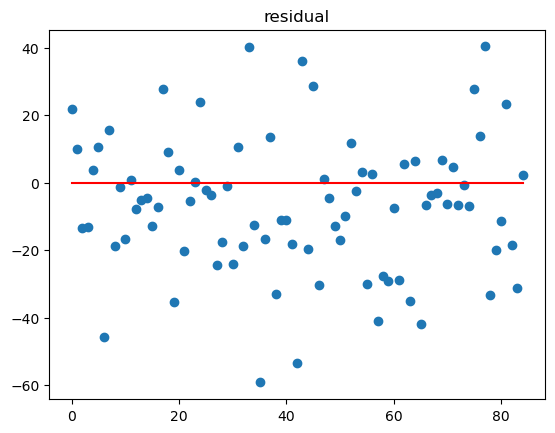

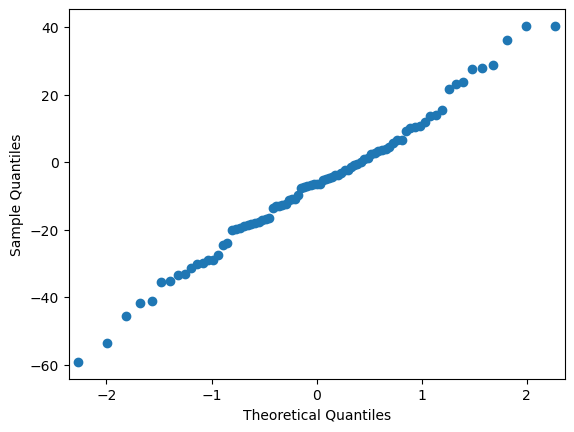

In [208]:
residual = np.asarray(y_test - y_pred)
plt.figure(1)
plt.scatter(range(len(residual)),residual)
plt.plot(range(len(residual)),np.zeros(len(residual)),'r')
plt.title('residual')
fig = sm.qqplot(residual)

In [209]:
from scipy.stats import ttest_1samp
p_values = acorr_ljungbox(residual, lags=[5], boxpierce=False)["lb_pvalue"].values[0]
# print the p-values
print("Ljung-Box test p-values:", p_values)

t_statistic, p_value = ttest_1samp(residual, popmean=0)

# print the p-value
print("t-test p-value:", p_value)
if p_values > 0.05 and p_value > 0.05:
    print('fail to reject the null hypothesis that the residuals are indenpendent')
    print('reject the null hypothesis that the mean of residuals are zero')
    print('Hence, the residuals are independent and have zero mean')

Ljung-Box test p-values: 0.030673810231046213
t-test p-value: 0.001983457215003457


In [210]:
features = pd.DataFrame(X_train.columns.to_list())
features['importance'] = importance
features = features.set_index(features.columns[0])
features = features.sort_values('importance',ascending=False)

In [211]:
features

,importance
0,
crime_total_count,1.342806e-01
crime_Other Assaults_count,1.258895e-01
crime_Vandalism/Criminal Mischief_count,1.226360e-01
COUNTY,8.529552e-02
PERSON_COUNT,6.095920e-02
WEATHER1_3,5.837850e-02
crime_Fraud_count,5.189987e-02
LOCATION_TYPE_0,4.391222e-02
crime_Robbery No Firearm_count,1.811257e-02


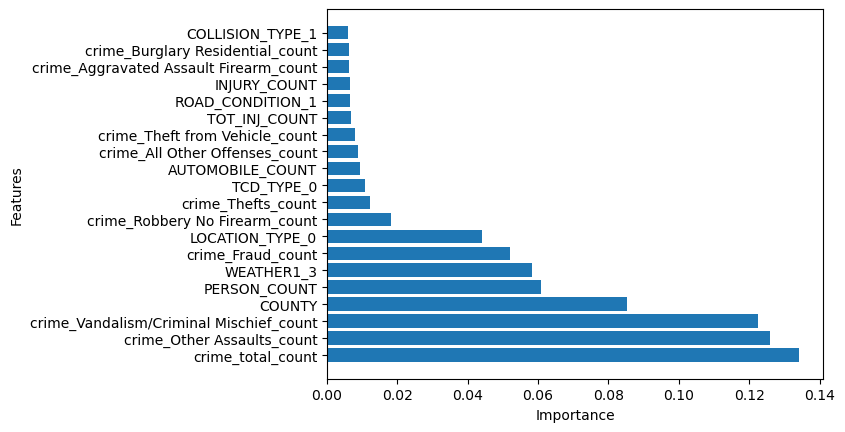

In [213]:
import matplotlib.pyplot as plt

features = pd.DataFrame(X_train.columns.to_list())
features['importance'] = importance
features = features.set_index(features.columns[0])
features = features.sort_values('importance',ascending=False)

importances_sorted = features.sort_values('importance', ascending=False)

plt.barh(importances_sorted.index[:20], importances_sorted['importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()